<a href="https://colab.research.google.com/github/raqueeb/ml-python/blob/master/colab/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ডিসিশন ট্রি কিভাবে কাজ করে? খালি চোখে আইরিস ডেটাসেট**

**মেশিন লার্নিং এর অ্যালগরিদম নিয়ে কথা কম কেন?**

আমি সাধারণত: মেশিন লার্নিং এর অ্যালগরিদম নিয়ে কম কথা বলি। প্রথমত: আমি রিসার্চ করতে বসিনি। বরং, বহু বছরের রিসার্চ থেকে পাওয়া আউটকামকে একটা প্রোডাক্টে ট্রান্সফর্ম করার মানসিকতা থেকে কাজ করি বেশিরভাগ সময়ে। দ্বিতীয়তঃ, প্রায়োরিটি। এই অল্প সময়ের যুগে কেচে গন্ডুস করে পুরনো জিনিস না ঘেঁটে বরং সেটাকে কিভাবে ব্যবহারযোগ্য করা যায় সেটার পেছনে সময় দেই বেশি।

আমার অভিজ্ঞতায় বলে, কোন অ্যাপ্লিকেশনে কোন ধরনের অ্যালগরিদম ভালো কাজ করে সেটা অনেকটাই স্ট্যান্ডার্ড হয়ে গেছে ইন্ডাস্ট্রিতে। সেই জিনিসটা ঠিকমতো জানলে কাজ শুরু করা যায় এ মুহূর্তে। অ্যালগরিদম কিভাবে কাজ করে সেটার পেছনে প্রচুর সময় দিয়ে আসল সময়ে মানে প্রোডাক্ট ডেভেলপমেন্ট এর সময় উৎসাহ হারিয়ে ফেলেন অনেকে। এখন, কেউ যদি একাডেমিক ফিল্ডে রিসার্চ করতে চান, তাদেরকে তো নতুন অ্যালগরিদম তৈরি করতে মানা করছেন না কেউ। তবে, পৃথিবীতে এতোই অ্যালগরিদম আছে যে সেগুলোর হাইপার-প্যারামিটারগুলোকে ঠিকমতো টিউন করতেই চলে যাবে বছরের পর বছর, সেখানে আমি এটার ব্যবহারিক দিক নিয়েই সন্তুষ্ট। আমার দরকার প্রোডাক্ট। সরকারের হয়ে বিশ্বের বড় বড় কোম্পানিগুলোর সাথে কাজ করতে গিয়ে এই উপলব্ধিটা কাজ করেছে বেশি। প্রজ্ঞা কিভাবে এলো তার থেকে দরকার বেশি সেই প্রজ্ঞা নিয়ে কী করতে চাই আমরা?

**মডেল ইন্টারপ্রেটেশন**

তবে, মডেল ইন্টারপ্রেটেশনে মানুষের বোঝার জায়গাটা কিছুটা লিমিটেড হয়ে আসছে আস্তে আস্তে। যেমন, আমরা দেখেছি ‘ডিসিশন ট্রি’ কিন্তু বেশ ইনট্যুটিভ, পাশাপাশি তাদের সিদ্ধান্ত নেবার ধারণাগুলো কিন্তু সহজেই ইন্টারপ্রেট করা যায়। এই মডেলগুলোকে আমরা সাধারণত: ‘হোয়াইট বক্স’ মডেল বলি। মানে, বাইরে থেকে বোঝা যায় কিভাবে মডেলটা সিদ্ধান্ত নিচ্ছে। খালি চোখে। 

এদিকে আমার দেখা সবচেয়ে বেশি ব্যবহার করা ‘র‌্যান্ডম ফরেস্ট’ মডেল অথবা নিউরাল নেটওয়ার্ক এর ভেতরে কি হচ্ছে সেটা জানা মানুষের পক্ষে অনেকটাই দুষ্কর হয়ে যাচ্ছে কমপ্লেক্সিটির কারণে। অংকের জোরে এরা বেশ ভালো প্রেডিকশন দিচ্ছে বটে, আমাদের আশেপাশে ক্যালকুলেশন বলছে তাদের আউটকামগুলো আগের অ্যালগরিদম থেকে বেশ ভালো অ্যাক্যুরেসি দিচ্ছে। তবে যে জিনিসটা মানুষ বুঝতে পারছে না বা সাধারণভাবে আমরা ধরতে পারছি না যে - কেন এই প্রেডিকশনগুলো ঘটছে? কারণ, এতো ডেটার মধ্যে এই অংকের হিসেব বের করা সাধারণ মানুষের পক্ষে অসম্ভব হয়ে দাঁড়িয়েছে। 

ধরুন, আমাদের নিউরাল নেটওয়ার্ক একটা ছবি থেকে একজন মানুষকে ঠিকমতো বের করতে পেরেছে, এখন মানুষ হিসেবে আমাদের বোঝাটা বেশ দুষ্কর যে - কোন বিশেষ এট্রিবিউটগুলো আসলে এই প্রেডিকশনকে ‘কন্ট্রিবিউট’ করেছে? মডেলটা কি ওই মানুষটার চোখ দেখে মানুষটাকে চিনেছে, নাকি তার মুখের কিছু ফিচার অথবা নাক নাকি তার দাঁড়ানোর ভঙ্গি? নাকি সে সবসময় যে ধরনের ব্যাকগ্রাউন্ড ব্যবহার করেন সেটা থেকে? হাজারো ডেটা পয়েন্ট থেকে কোন ডেটাগুলো এই ব্যাপারগুলোকে ‘কন্ট্রিবিউট’ অথবানেগেটিভলি কো-রিলেট করছে সেটা সাধারণ পার্সপেক্টিভ থেকে বের করা কঠিন।

**কেন ডিসিশন ট্রি?**

অনেক অ্যালগরিদম নিয়ে কাজ করা হয়েছে এর মধ্যে। সেদিক থেকে মানুষকে বোঝানোর জন্য আমার প্রিয় একটা মডেল হচ্ছে এই ডিসিশন ট্রি। এটা মানুষের বোঝার মতো করে খুবই সহজ ক্লাসিফিকেশন/রিগ্রেশন রুলগুলো দেখিয়ে দেয় আমাদের। আমার আগের বইটাতে এই ডিসিশন ট্রি নিয়ে একটা বড় চ্যাপ্টার লিখেছিলাম। যেহেতু পুরো বইটা আছে ইন্টারনেটে, দেখে নিতে পারেন একটু। তবে না দেখলে সমস্যা নেই। আমি এখানে সে জিনিসটা কাভার করে দেব পাইথনের লাইব্রেরি দিয়ে। 

পৃথিবীর এই অসম্ভব জনপ্রিয় এবং প্রচন্ড ক্ষমতাশালী অ্যালগরিদম ‘র‌্যান্ডম ফরেস্টে’র মূল ভিত্তি কিন্তু এসেছে এই ‘ডিসিশন ট্রি’ থেকে। আর সেকারণে এই চ্যাপ্টারে আমরা দেখাবো কিভাবে একটা ডিসিশন ট্রি ব্যবহার করে এই আইরিস ডেটা সেটের প্রেডিকশন করতে হয়। এর অর্থ হচ্ছে একটা ‘এন্ড টু এন্ড’ ডেমনস্ট্রেশন। আমাদের সাইকিট-লার্ন এখানে একটা ‘কার্ট’ - ‘ক্লাসিফিকেশন এন্ড রিগ্রেশন ট্রি’ অ্যালগরিদম ব্যবহার করে যেই সিদ্ধান্তের গাছগুলোকে বড় করার জন্য, যেটা আসলে একটা বাইনারি ট্রি। 

এখানে পাতা ছাড়া (লীফ নয়) নোডগুলোতে সব সময় দুটো চিল্ড্রেন থাকে। এর মানে হচ্ছে শুধুমাত্র প্রশ্নের হ্যাঁ অথবা না উত্তর এর উপর ভিত্তি করে সিদ্ধান্তের গাছটা বড় হতে থাকে। অরালিয়েন জেরোনের বইটা থেকে নিয়ে এলাম ধারণাটাকে। হাতেকলমের জন্য একটা অসাধারণ বই।

**হাতেকলমে ডিসিশন ট্রি**

ডিসিশন ট্রি বোঝার আগে লোড করে নেই আমাদের আইরিস ডেটাসেট। প্রেডিকশন করার পর আউটপুটের গ্রাফ ডেফিনিশন থেকে বুঝে যাব কিভাবে এই ডিসিশনট্রিটা প্রেডিক্ট সিদ্ধান্ত নিল। তৈরি তো আপনারা?

ইমপোর্ট করে নিলাম ডিসিশন ট্রি ক্লাসিফায়ারকে। বোঝার সুবিধার জন্য আমাদের ডিসিশন ট্রি এর ডালপালা বেশি বাড়তে দিলাম না শুরুতেই। পাশাপাশি আমাদের আইরিস ডেটাসেটের পুরো চারটা ফিচার নিয়ে সিদ্ধান্তের গাছপালা তৈরি করলে সেটার ডালপালা অনেক বড় হয়ে যেতে পারে বলে সেটাকে কমিয়ে দিলাম দুটো ফিচারে। এখানে নামপাই এর অ্যারে স্লাইসিং ব্যবহার করছি দরকারি ফিচারগুলোকে এক্সট্র্যাক্ট করার জন্য। আমাদের চেষ্টা থাকবে ব্যাপারটাকে আগাগোড়া বুঝতে। আর সে কারণেই ফেলে দিলাম বেশি বেশি কম্প্লেক্সিটি - এই হাইপার-প্যারামিটারে।

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

In [2]:
# লোড করি পুরো ডেটা, কী দেখাবে?
X = iris.data
# দেখি কী আছে ভেতরে?
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
# আমরা একটা ফিচার নেই, ঠিক ধরেছেন, পেটাল প্রস্থ - নামপাই এর অ্যারে স্লাইসিং করে 
X = iris.data[:, 3:]
# দেখে নেই এখন ভেতরে কী কী এসেছে?
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [4]:
# আমরা শেষ দুটো ফিচার নেই, ঠিক ধরেছেন, একটা পেটাল দৈর্ঘ্য আর পেটাল প্রস্থ 
X = iris.data[:, 2:]
# দেখে নেই এখন ভেতরে কী কী এসেছে?
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [5]:
# ট্রেনিং করিয়ে নিচ্ছি 
y = iris.target

# ডেপ্থ ২ মাত্র 
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

**ছবিটা তৈরি করি **

আমাদের গ্রাফ ডেফিনেশন ফাইলটাকে আমাদের প্রয়োজনীয় ‘ভিউয়েবল’ ফরম্যাটে কনভার্ট করে নেই। পিএনজি। গুগল কোলাবের ভেতরে ইনলাইন মোডে দেখার জন্য একটা নতুন মেথড কল করে নিয়ে আসি। অসাধারণ। আমাদের এই প্রথম ডিসিশন ট্রিটা দেখতে কিছুটা এরকম হবে। এখন দেখে আসি কিভাবে এই ডিসিশন ট্রিটা প্রেডিকশন করছে? এর ডেপ্থ লেভেল মাত্র ২। পাশাপাশি ব্যবহৃত ফিচারের সংখ্যাও ২। ফুলের পেটাল এর দৈর্ঘ্য এবং প্রস্থ। দুটো সংখ্যা। এর মানে ডিসিশন ট্রিএর ডালপালা অনেকটাই ছেঁটে ফেলে দিয়েছি কমপ্লেক্সিটি এড়াতে।


In [0]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
        tree_clf,
        out_file='tree.dot',
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

আমাদের গ্রাফ ডেফিনেশন ফাইলটাকে আমাদের প্রয়োজনীয় ‘ভিউয়েবল’ ফরম্যাটে কনভার্ট করে নেই। পিএনজি। গুগল কোলাবের ভেতরে ইনলাইন মোডে দেখার জন্য একটা নতুন মেথড কল করে নিয়ে আসি। 

অসাধারণ। আমাদের এই প্রথম ডিসিশন ট্রিটা দেখতে কিছুটা এরকম হবে। এখন দেখে আসি কিভাবে এই ডিসিশন ট্রিটা প্রেডিকশন করছে? এর ডেপ্থ লেভেল মাত্র ২। পাশাপাশি ব্যবহৃত ফিচারের সংখ্যাও ২। ফুলের পেটাল এর দৈর্ঘ্য এবং প্রস্থ। দুটো সংখ্যা। এর মানে ডিসিশন ট্রিএর ডালপালা অনেকটাই ছেঁটে ফেলে দিয়েছি কমপ্লেক্সিটি এড়াতে।


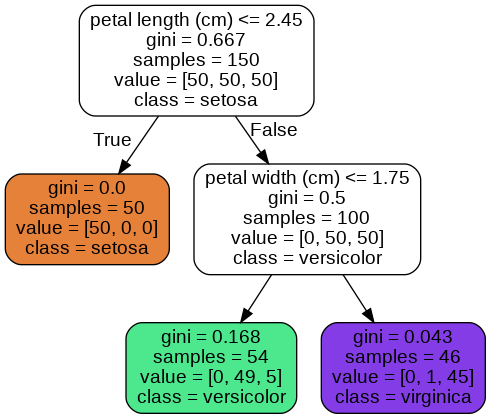

In [8]:
# আমাদের দরকারি ফরম্যাটে ছবিতে পাল্টে নেই, গুগল কোলাব হবার কারণে 
# আলাদা করে graphviz ইনস্টল করার প্রয়োজন নেই। জুপিটার নোটবুকে প্রয়োজন 
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

#  আমাদের নোটবুকে ডিসপ্লে করি 
from IPython.display import Image
Image(filename = 'tree.png')

**খালি চোখে প্রেডিকশন **

ধরুন, আপনার বন্ধু আপনাকে একটা আইরিস প্রজাতির ফুল উপহার দিয়েছেন। আপনি সেই ফুলের প্রজাতি দিয়ে ক্লাসিফাই করতে চান। স্বাভাবিকভাবেই আপনি শুরু করবেন রুট নোড দিয়ে। এর ডেপ্থ হচ্ছে ০, শুরু হবে একদম উপর থেকে। এই নোডে তার প্রশ্ন হবে - এই ফুলটার পেটাল দৈর্ঘ্য ২.৪৫ সেন্টিমিটার থেকে কম কিনা? প্রশ্নের উত্তর যদি হ্যাঁ মানে সত্যি হয় তাহলে সেটা চলে যাবে রুট নোড ধরে  বাঁ দিকের চাইল্ড নোডে। এটার ডেপথ হচ্ছে ১, ছবিতে দেখুন এটা আছে বাঁদিকের লিফ নোড এ। এটা লীফ নোড কারণ এর কোন চাইল্ড নোড নেই। মানে - এর কোন সত্য বা মিথ্যা হবার জন্য নতুন কোন প্রশ্নের সম্মুখীন হতে হবে না। এই লীফ নোড এর বক্সের ভেতরে তাকালেই বুঝতে পারব আমাদের প্রেডিকটেড ক্লাস কি? এখানে আমাদের ডিসিশন ট্রি প্রেডিক্ট করে দিয়েছে যে - আমাদের ফুলটা হচ্ছে আইরিস- সেটোসা প্রজাতির।

**আরেকটা প্রেডিকশন**

ধরুন, এবার আপনাকে আরেকটা ফুল দেওয়া হলো, তবে এবার সেটার পেটাল দৈর্ঘ্য ২.৪৫ সেন্টিমিটার থেকে বেশি। তাহলে কি হবে? প্রশ্নের উত্তর ‘না’ মানে মিথ্যা হওয়াতে আমাদের সিদ্ধান্ত নিচে নেমে রুট নোডের ডান দিকে চাইল্ড নোডে এসে দাঁড়াবে। এটার ডেপ্থ হচ্ছে এক এবং ডানের বক্স। দেখা যাচ্ছে যে এটা কিন্তু লীফ নোড না,তার মানে আমাদেরকে আর একটা প্রশ্নের সম্মুখীন হতে হবে। নতুন প্রশ্ন হচ্ছে - ফুলের পেটাল প্রস্থ কি ১.৭৫ সেন্টিমিটারের কম কিনা? যদি প্রশ্নের উত্তর সত্যি হয় তাহলে ফুলটি আইরিস-ভার্সিকালার হবার সম্ভাবনা বেশি। এটার ডেপ্থ দ্বিতীয় লেভেলের এবং বামের লীফ নোট। এই প্রশ্নের উত্তর যদি ‘না’ হয়, তাহলে এটা আইরিস-ভার্জিনিকা হবে। এটার ডেপথ লেভেল ২, ডানের লীফ নোড।

**ট্রেনিং ইন্সট্যান্স**

আমাদের রুট নোডের ‘অ্যাট্রিবিউট’ এর সংখ্যা দিয়ে বোঝা যায় যে কতগুলো ‘ট্রেনিং ইন্সট্যান্স’ এই নোডের ওপর কাজ করবে। রুট নোডে এটা পুরো ১৫০টা ‘ট্রেনিং ইন্সট্যান্স’ এর ওপর কাজ করবে। যেহেতু, পুরো ডেটসেট ৫০ করে তিনটা প্রজাতিকে আলাদা আলাদা করে রিপ্রেজেন্ট করছে। ৫০, ৫০, এবং ৫০। পাশাপাশি দেখা যাচ্ছে ১০০টা ট্রেনিং ‘ইনস্ট্যান্স’ এর পেটাল দৈর্ঘ্য ২.৪৫ সেন্টিমিটারের বেশি। এটার ডেপ্থ ১ এবং বামের চাইল্ড নোড। এই ১০০ এর মধ্যে ৫৪টা ফুলের পেটাল প্রস্থ ১.৭৫ সেন্টিমিটারের কম। এটার ডেপ্থ ২ এবং জিনিসটা বামের লীফ নোড। একটা নোডের ভ্যালু ‘অ্যাট্রিবিউট’ বলছে কয়টা ‘ট্রেনিং ইনস্ট্যান্স’ কাজ করছে ওই একেকটা ক্লাসের ওপর। যেমন, সবচেয়ে নিচের ডানের লীফ নোড বলছে এই ইনস্ট্যান্স এর মধ্যে ০টা হচ্ছে আইরিস-সেটোসা, ১টা হচ্ছে ভার্সিকালার আর বাকী ৪৫টা ভার্জিনিকা। অসাধারণ, তাই না?


গিটহাবের লিংক

https://github.com/raqueeb/ml-python/blob/master/colab/decision_tree.ipynb

গুগল কোলাবের লিংক 

https://colab.research.google.com/github/raqueeb/ml-python/blob/master/colab/decision_tree.ipynb